$$ \LaTeX \text{ command declarations here.}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\X}{\mathcal{X}}
\newcommand{\D}{\mathcal{D}}
$$

In [2]:
%pylab inline
import numpy as np
import seaborn as sns
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


# EECS 445:  Machine Learning
## Lecture 13:  Error Metrics and ML Advice
* Instructor:  **Jacob Abernethy**
* Date:  Halloween 2016!


### Today's Lecture: *Measuring Error* and *Machine Learning Advice * 
- What are different measures of performance for ML algorithms?
- How does one go about choosing and applying an ML algorithm?
- How does one improve the performance of an ML algorithm?

## Using a "Holdout" set to estimate performance

- Typically we maintain a set of data $(\vec{x}_1,y_1), \ldots, (\vec{x}_n, y_n)$ that we "don't touch" until after training
- We use the "testing loss/error" as a guess of the true loss/error of our predictor $h$:
$$
    \text{Loss}_{\text{test}}(h) = \frac 1 n \sum_{i=1}^n \ell(h(\vec{x}_i), y_i) 
$$
- **FACT**: The testing error of $h$ is an *unbiased estimate* of the true error rate of $h$
- **Question**: why is the above not true if we used the *training* dataset instead?

## Sometimes we don't always care about expected loss

Think about these cases:
- Detecting disease
- Classifying documents as spam/not-spam
- Searching through photos
- Detecting pedestrians on the street
- Predicting whether a customer will make a purchase

## A handy Wikipedia table for error metrics
[More here](https://en.wikipedia.org/wiki/Precision_and_recall)

<img src="images/error_measures.png">

## Precision vs. Recall

<img src="images/Precisionrecall.png">

## Precision vs Recall
$$\text{precision}=\frac{|\{\text{true positive}\}\cap\{\text{predicted positive}\}|}{|\{\text{predicted positive}\}|}$$

$$\text{recall}=\frac{|\{\text{true positive}\}\cap\{\text{predicted positive}\}|}{|\{\text{true positive}\}|}$$

- Precision is the probability that a (randomly selected) predicted-positive example is truly positive.
- Recall is the probability that a (randomly selected) true positive example was actually predicted positive.



## F-measure: combine precision and recall

In certain scenarios, we want to combine the precision and recall together
$$F = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{ \mathrm{precision} + \mathrm{recall}}$$
This is the *harmonic mean* of precision and recall

## Alternative View: Using the **scores** of a classification algorithm

- Many ML algorithms return a **score** for each example
- Essentially this produces a *ranking* on a test set
    - For example, in an SVM we can rank the $\vec{x}_i$'s by the values $\vec{w}^\top \vec{x}_i + b$
- What is the "performance of this ranking"?

## One perspective: the Precision Recall Curve
<img src="images/two-precision-recall-curves.png">
- People often want to know what is the tradeoff between precision and recall *when we change the decision threshold*. 
- Above is an example "PR-curve"

## Also common: The Receiver Operating Characteristic

<img src="images/Roccurves.png">

- We can also plot the ROC curve: the tradeoff between True Positive rate and the False Positive rate

## An Important Metric: Area Under the ROC Curve
- The AUROC (or sometimes just AUC) is the area under the ROC curve
<img src="images/AUC.jpeg">
- The AUROC has meaning, it tells us "if we take a random positive example, and a random negative example, what is the probability that our hypothesis **scores these two examples in the appropriate order**"

# ML Advice

### A Question to Ponder
#### What is the goal of Machine Learning and ML algorithms?

Common Goal:
   - Not to learn an exact representation of the training data itself. 
   - Build a statistical model of the process which generates the data (Statistical Inference).
   - This is important if the algorithm is to have good generalization performance.

### At the beginning...

- Suppose you are given some dataset and are asked to analyze it
    - research project, data science job, homework assignment...
- What is the first thing you will do once you are given this task?

### Mysterious Data...

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(1000, n_features=5, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)

from pandas import DataFrame
df = DataFrame(np.hstack((X, y[:, None])), 
               columns = list(range(5)) + ["class"])

In [3]:
df[:5]

,0,1,2,3,4,class
0,-0.744656,-1.002108,-0.229806,0.834371,0.250114,0
1,1.798666,-0.022413,1.666616,0.980480,-0.404352,1
2,-0.940481,-1.219292,-0.311325,0.996956,-2.005125,0
3,0.567027,0.260004,0.403881,-0.018421,-1.033165,1
4,1.352852,-0.507426,1.476739,1.339058,-1.572796,1


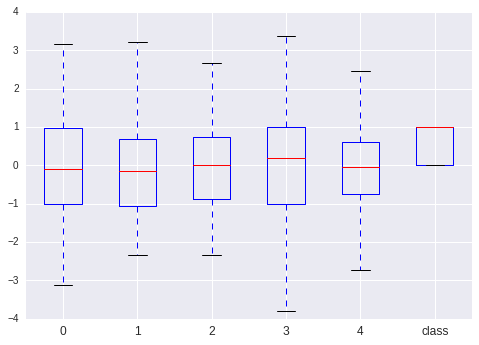

In [4]:
x = df.boxplot(return_type='dict')
plt.show()

In [5]:
df.describe()

,0,1,2,3,4,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.026570,-0.035264,-0.008423,0.029168,-0.052110,0.501000
std,1.182997,1.166586,1.015775,1.327471,0.954592,0.500249
min,-3.107342,-2.339154,-2.346431,-3.806020,-3.116857,0.000000
25%,-1.000162,-1.058573,-0.879891,-1.006694,-0.735595,0.000000
50%,-0.100546,-0.157854,0.003162,0.185798,-0.050095,1.000000
75%,0.975560,0.686004,0.748515,0.987554,0.600995,1.000000
max,3.172533,3.646599,2.677722,3.378403,2.929096,1.000000


### Where to start?

Analyze the data and preprocess using simple statistical measurements and tools. Look for:
 - Number of features? Number of classes? (for classification)
 - Mean, Median, Mode?
 - Correlation? 
 - Dataset size? Missing samples?
 - Are samples labeled?

### Data Visualization

**Pro:** Can often be more useful than mathematical statistical analysis to get a good grasp of what the dataset looks like.
- *"Big Picture"* view

**Con:** High-dimensional data can be hard to visualize.
- Projections may be misleading.

Visualizations of the *mysterious dataset* follow...

### Pairwise Feature Plot

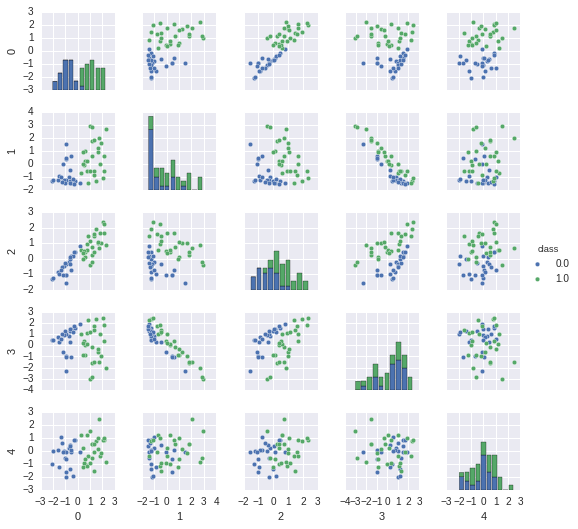

In [6]:
# Pairwise feature plot
_ = sns.pairplot(df[:50], vars=[0, 1, 2, 3, 4], hue="class", size=1.5)

### Correlation Plot

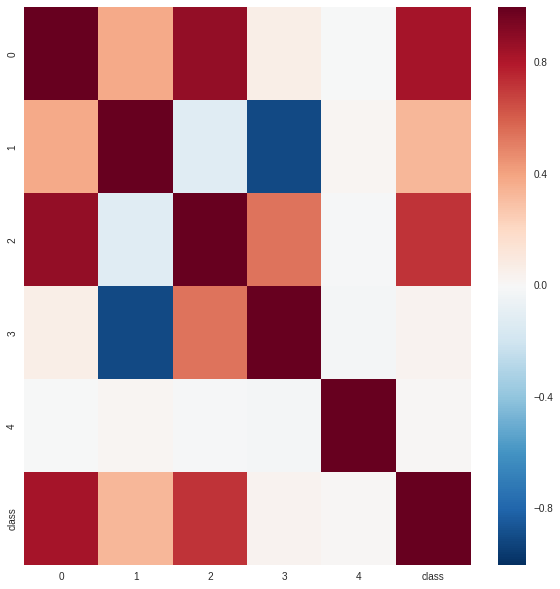

In [7]:
# Correlation Plot
plt.figure(figsize=(10, 10));
_ = sns.heatmap(df.corr(), annot=False)

### General Approaches to a Data Problem

After doing some visualization and simple statistical analysis or preprocessing of data, how should one proceed?

### Approach 1: Careful Design 
- Things to do:
 - Engineer/Select exactly the right features.
 - Collect the right dataset.
 - Design the right algorithms.
- Implement and hope it works.

### Approach 1:  Careful Design

- Pros: 
 - Can lead to new, elegant and scalable algorithms. 
 - Contributions to ML theory are generally done using this approach.
- Cons: 
 - Can be time consuming. Slow time to market for companies. 
 - "Premature optimization is the root of all evil." - Donald Knuth (Note: while this quote was intended to talk about programming, premature statistical optimization can also be quite evil.)

### Approach 2: Build and Fix
- Implement something quickly.
- Run error analyses and diagnoses to see if anything can be improved. Repeat until some performance criteria is met or goal is reached.

### Approach 2:  Build and Fix

Pros: 
- Easy especially with vast computing resources (can try different methods more easily). 
- Fast time to market.

Cons: 
- Not systematic. 
- Can miss out on the reasoning behind why a model works well. 

### Choosing a Method

Not easy to immediately decide what to use. Some things to consider first: 
- Supervised vs. Unsupervised vs. Semi-supervised vs. Active Learning vs. Reinforcement Learning ...?
- Generative vs. Discriminative? 
- Parametric vs. Non-parametric?

### Choosing a Method

Still wondering how to go about choosing methods from an applied viewpoint? 
 - There are many guides (see next few slides). 
 - Go ahead and try different algorithms! (Similar to approach 2) We will also talk about how to measure performance and deal with poor performance later.

<img src="images/sklearn_sheet.png"/>

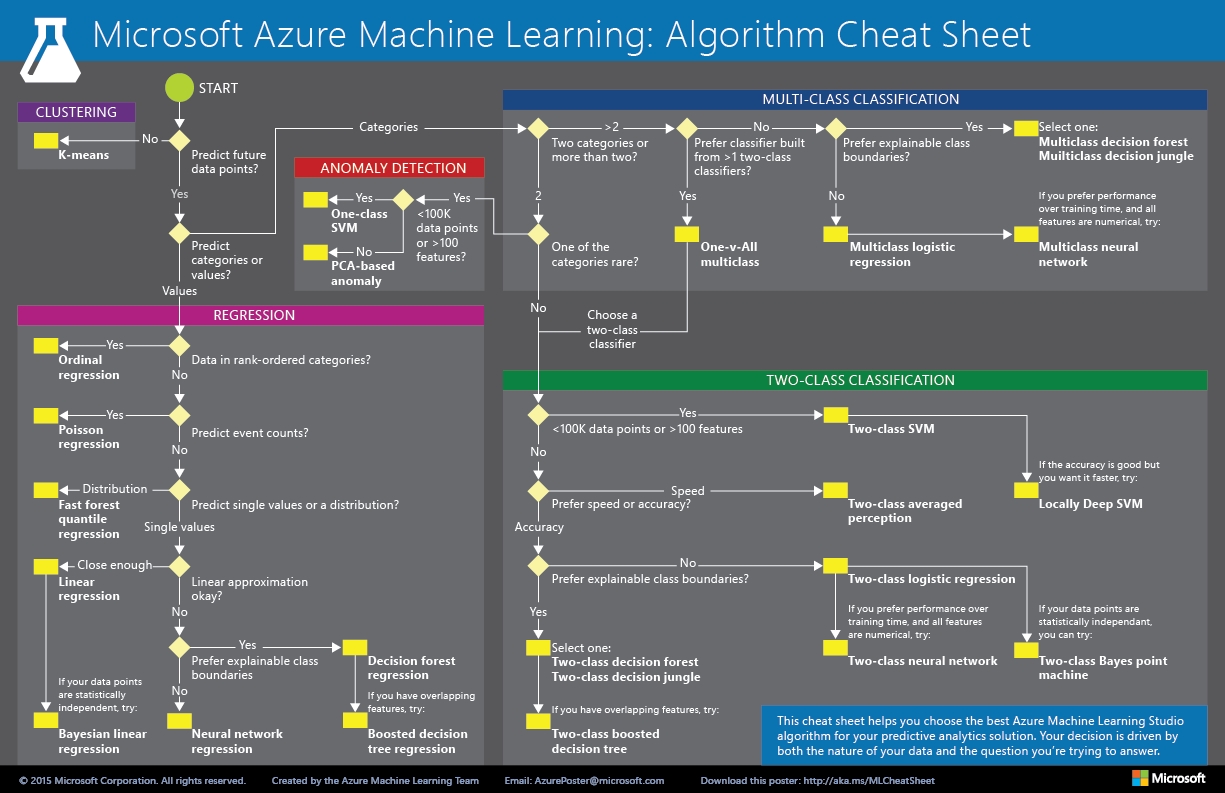

In [8]:
from IPython.display import Image
Image(filename='images/azure_sheet.png', width=800, height=600) 

## Break Time!

<img src="https://img.buzzfeed.com/buzzfeed-static/static/2013-10/enhanced/webdr01/15/9/anigif_enhanced-buzz-31540-1381844535-8.gif"/>

### Interpretations of Bias
 - Captures the errors caused by the simplifying assumptions of a model.
 - Captures the average errors of a model across different training sets.

### Interpretations of Variance
 - Captures how much a learning method moves around the mean. 
 - How different can one expect the hypotheses of a given model to be?
 - How sensitive is an estimator to different training sets?

### Complexity of Model

- Simple models generally have high bias and complex models generally have low bias. 
- Simple models generally have low variance andcomplex models generally have high variance.


- Underfitting / Overfitting
 - High variance is associated with overfitting.
 - High bias is associated with underfitting.

### Training set size
 
- Decreasing the training set size
  - Will in general not help in improving performance. 
  - Can attain the same performance with smaller training samples however.
  - Additional advantage of increases in speed.


- Increase the training set size
 - Decreases Variance by reducing overfitting.

### Number of features
- Increasing the number of features.
 - Decreases bias at the expense of increasing the variance.

- Decreasing the number of features.
 - Dimensionality reduction can decrease variance by reducing over-fitting.


### Features 

Many techniques for engineering and selecting features (Feature Engineering and Feature Extraction)
 - PCA, Isomap, Kernel PCA, Autoencoders, Latent sematic analysis, Nonlinear dimensionality reduction, Multidimensional Scaling

### Features

The importance of features
 > "Coming up with features is difficult, time-consuming, requires expert knowledge.  Applied machine learning is basically feature engineering" 
 - Andrew Ng
 
 
 > "... some machine learning projects succeed and some fail.  What makes the difference? Easily the most important factor is the features used." 
 - Pedro Domingo

### Regularization (Changing $\lambda$)

Regularization is designed to impose simplicity by adding a penalty term that depends on the charactistics of the parameters.

- Decrease Regularization. 
 - Reduces bias (allows the model to be more complex).
 
 
- Increase Regularization.
 - Reduces variance by reducing overfitting (again, regularization imposes "simplicity.") 

### Ideal bias and variance?

- All is not lost. Bias and Variance can both be lowered through some methods:
 - Ex: Boosting (learning from weak classifiers).

- The sweet spot for a model is the level of complexity at which the increase in bias is equivalent to the reduction in variance. 

# Model Selection

### Model Selection 

- ML Algorithms generally have a lot of parameters that must be chosen. A natural question is then "How do we choose them?"
 - Examples: Penalty for margin violation (C), Polynomial Degree in polynomial fitting

### Model Selection

- Simple Idea: 
 - Construct models $M_i, i = 1, ..., n$.
 - Train each of the models to get a hypothesis $h_i, i = 1, ..., n$.
 - Choose the model $h_i$ that performs best on the training set.
- Does this work? No! Overfitting. This brings us to **cross validation**.

### Hold-Out Cross Validation 

(1) Randomly split the training data $D$ into $D_{train}$ and $D_{val}$, say 70% of the data and 30% of the data respectively.

(2) Train each model $M_i$ on $D_{train}$ only, each time getting a hypothesis $h_i$.

(3) Select and output hypothesis $h_i$ that had the smallest error on the held out validation set.

Disadvantages: 
 - Waste some sizable amount of data (30\% in the above scenario) so that less training examples are available.
 - Using only some data for training and other data for validation.

### K-Fold Cross Validation (Step 1)

Randomly split the training data $D$ into $K$ ***disjoint*** subsets of $N/K$ *testing* samples each.
 - Let these subsets be denoted $D_1, ..., D_K$.

### K-Fold Cross Validation (Step 2)

For each model $M_i$, we evaluate the model as follows: 
 - Train the model $M_i$ on $D \setminus D_k$ (all of the subsets except subset $D_k$) to get hypothesis $h_i(k)$.
 - Test the hypothesis $h_i(k)$ on $D_k$ to get the error (or loss) $\epsilon_i(k)$.
 - Estimated generalization error for model $M_i$ is then given by $e^g_i = \frac{1}{K} \sum \limits_{k = 1}^K \epsilon_i (k)$

### K-Fold Cross Validation (Step 3)

Pick the model $M_i^*$ with the lowest estimated generalization error $e^{g*}_i$ and retrain the model on the entire training set, thus giving the final hypothesis $h^*$ that is output.

### Three Way Data Splits

- If model selection and true error estimates are to be computed simaltaneously, the data needs to be divided into three disjoin sets.

- Training set: A set of examples used for learning
- Validation set: A set of examples used to tune the hyperparameters of a classifier.
- Test Set: A set of examples used *** only *** to assess the performance of a fully-trained model.

### Procedure Outline

1. Divide the available data into training, validation and test set
2. Select a model (and hyperparameters)
3. Train the model using the training set
4. Evaluate the model using the validation set
5. Repeat steps 2 through 4 using different models (and hyperparameters)
6. Select the best model (and hyperparameter) and train it using data from the training and validation set
7. Assess this final model using the test set

### How to choose hyperparameters?

Cross Validation is only useful if we have some number of models. This often means constructing models each with a different combination of hyperparameters.

### Random Search
 - Just choose each hyperparameter randomly (possibly within some range for each.)
 - Pro: Easy to implement. Viable for models with a small number of hyperparameters and/or low dimensional data.
 - Con: Very inefficient for models with a large number of hyperparameters or high dimensional data (curse of dimensionality.)

### Grid Search / Parameter Sweep
 - Choose a subset for each of the parameters.
  - Discretize real valued parameters with step sizes as necessary.
 - Output the model with the best cross validation performance. 
 - Pro: "Embarassingly Parallel" (Can be easily parallelized)
 - Con: Again, curse of dimensionality poses problems.

### Bayesian Optimization
 
- Assumes that there is a smooth but noisy relation that acts as a mapping from hyperparameters to the objective function.

- Gather observations in such a manner as to evaluate the machine learning model the least number of times while revealing as much information as possible about the mapping and, in particular, the location of the optimum.

- Exploration vs. Exploitation problem.

### Learning Curves
Provide a visualization for diagnostics such as:
- Bias / variance
- Convergence 

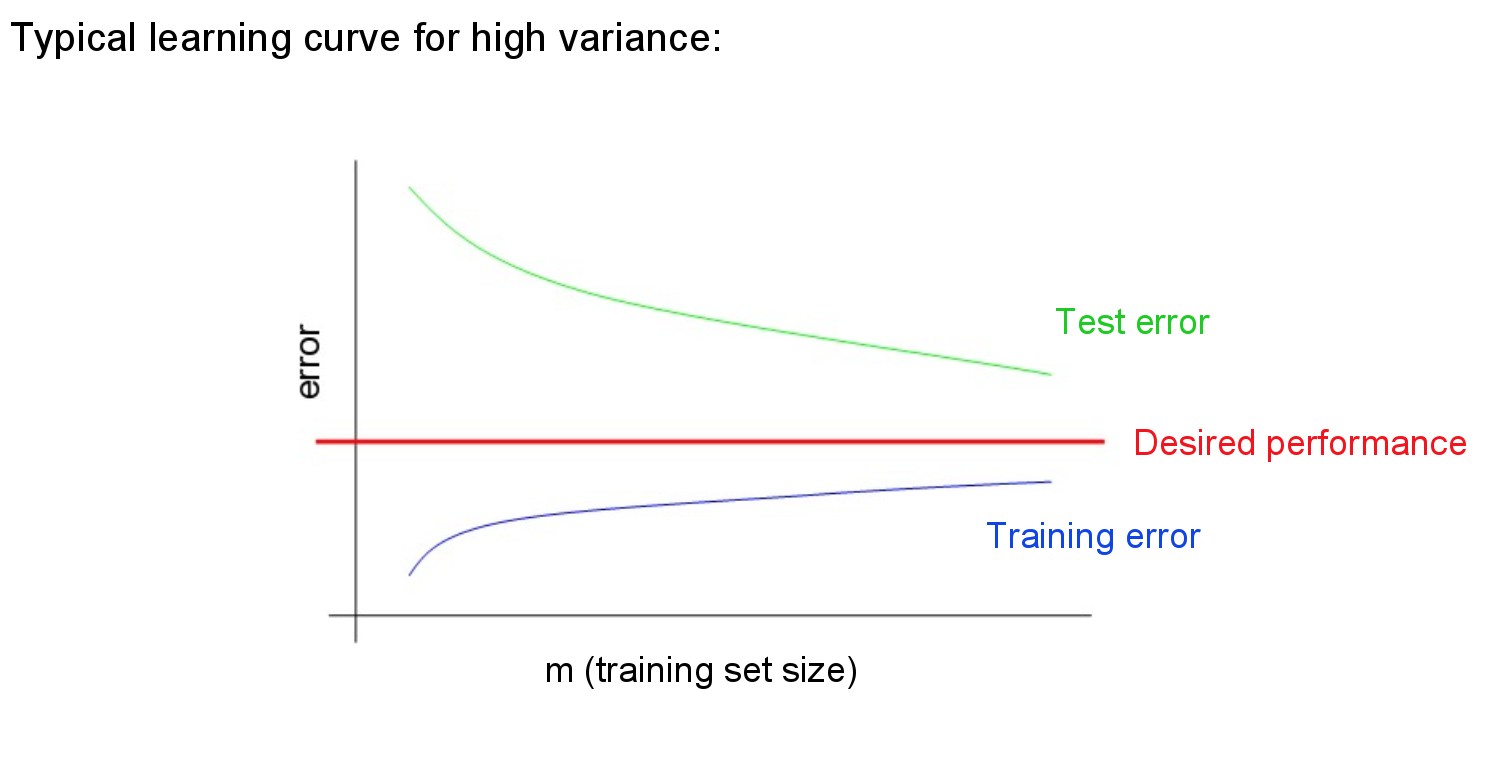

In [32]:
# Image from Andrew Ng's Stanford CS229 lecture titled "Advice for applying machine learning"
from IPython.display import Image
Image(filename='images/HighVariance.png', width=800, height=600)

# Testing error still decreasing as the training set size increases. Suggests increasing the training set size.
# Large gap Between Training and Test Error.

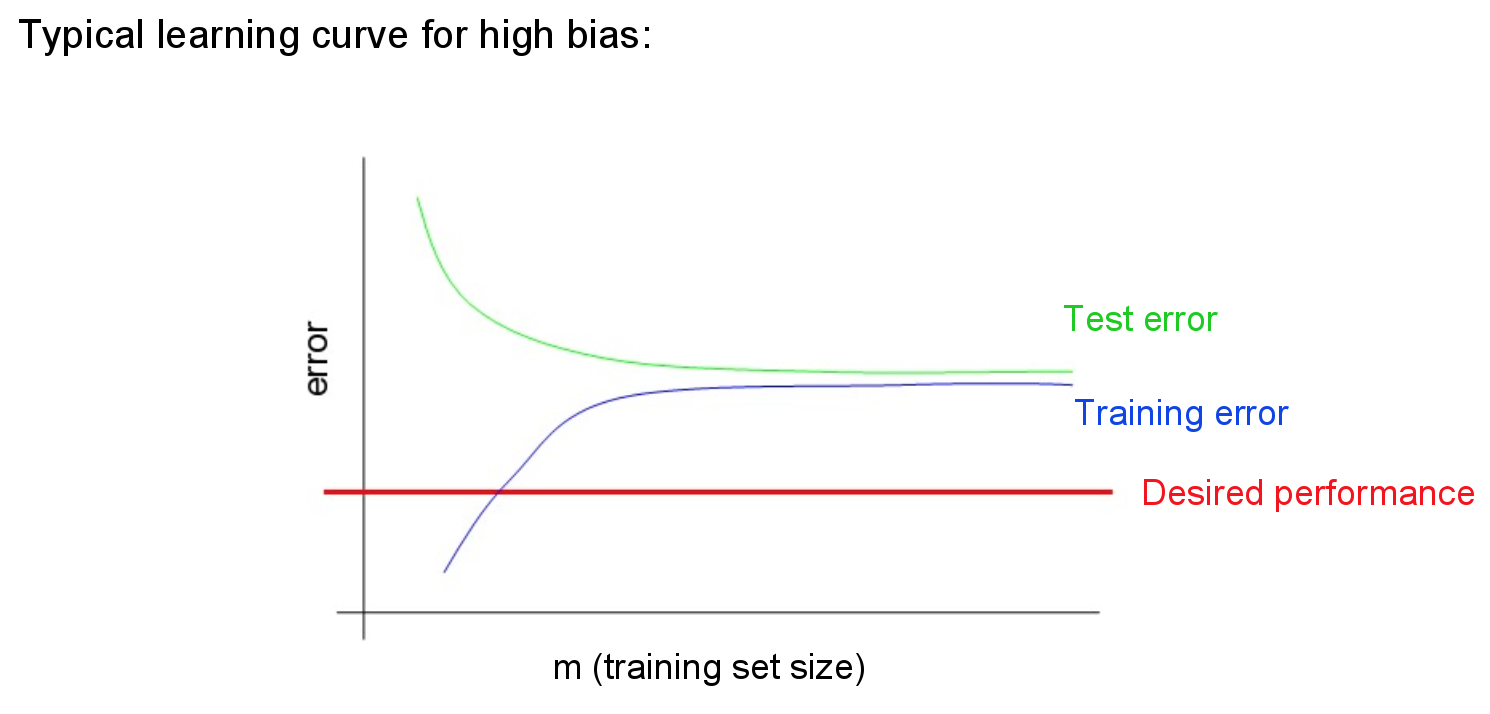

In [33]:
# Image from Andrew Ng's Stanford CS229 lecture titled "Advice for applying machine learning"
from IPython.display import Image
Image(filename='images/HighBias.png', width=800, height=600)

# Training error is unacceptably high.
# Small gap between training error and testing error.

### Convergence

- Approach 1: 
 - Measure gradient of the learning curve.
 - As learning curve gradient approaches 0, the model has been trained. Choose threshold to stop training.

- Approach 2: 
 - Measure change in the model parameters each iteration of the algorithm.
 - One can assume that training is complete when the change in model parameters is below some threshold.

### Diagnostics related to Convergence (1)
- Convergence too slow? 
 - Try using Newton's method.
 - Larger step size. 
  - Note that too large of a step size could also lead to slow convergence (but the learning curves in general will then suggest instability if "oscillations" are occuring.)
 - Decrease batch size if using a batch based optimization algorithm.

### Diagnostics related to Convergence (2)

- Are the learning curves stable? If not: 
 - Switch to a batch style optimization algorithm if not already using one (like minibatch gradient descent / gradient descent).
 - Increase batch sizes if already using one.
- Some algorithms always ensure a decrease or increase in the objective function each iterations. Ensure that this is the case if the optimization algorithm being used provides such guarantees.

### Ablative Analysis

- Similar to the idea of cross validation, except for components of a system.

- Example: Simple Logisitic Regression on spam classification gives 94% performance.
 - 95% with spell correction
 - 96% with top 100 most commonly used words removed
 - 98% with extra sender and receiver information 
 - 99% overall performance